In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [5]:
## importing the csv file

df = pd.read_csv('stud.csv')

In [6]:
# checking for missing values - no missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
#checking for dupilcate values - no duplicated values
df.duplicated().sum()

0

In [13]:
# checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
#checking the stats of the dataset and the shape
print(df.describe())
print("\n",df.shape)

       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

 (1000, 8)


In [20]:
#separeting the numerical and categorical features

numerical_feature = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_feature = [feature for feature in df.columns if df[feature].dtype =="O"]

print('We have {} Numberical features :{}'.format(len(numerical_feature),numerical_feature))
print('we have {} Categorical features:{}'.format(len(categorical_feature),categorical_feature))

We have 5 Numberical features :['math_score', 'reading_score', 'writing_score', 'total_mark', 'average_mark']
we have 5 Categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
#checking the number of unique vaules in each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## Exploring data

In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_mark,average_mark
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [16]:
print("Categorical in 'gender' column :",end=" ")
print(df['gender'].unique())

print("Categorical in 'race_ethnicity' column :",end=" ")
print(df['race_ethnicity'].unique())

print("Categorical in 'parental_level_of_education' column :",end=" ")
print(df['parental_level_of_education'].unique())

print("Categorical in 'lunch' column :",end=" ")
print(df['lunch'].unique())

print("Categorical in 'test_preparation_course' column :",end=" ")
print(df['test_preparation_course'].unique())

Categorical in 'gender' column : ['female' 'male']
Categorical in 'race_ethnicity' column : ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical in 'parental_level_of_education' column : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical in 'lunch' column : ['standard' 'free/reduced']
Categorical in 'test_preparation_course' column : ['none' 'completed']


In [17]:
### adding total and average marks columns in dataset
df['total_mark'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_mark'] = df['total_mark']/3

In [24]:
reading_full = df[df['reading_score']==100]['average_mark'].count()
writing_full = df[df['writing_score']==100]['average_mark'].count()
math_full = df[df['math_score']==100]['average_mark'].count()

print("Number of student with full Score in math :{}.".format(math_full))
print("Number of student with full Score in reading:{}.".format(reading_full))
print("Number of student with full Score in writing :{}.".format(writing_full))


Number of student with full Score in math :7.
Number of student with full Score in reading:17.
Number of student with full Score in writing :14.


In [26]:
reading_less_20 = df[df['reading_score']<=20]['average_mark'].count()
writing_less_20 = df[df['writing_score']<=20]['average_mark'].count()
math_less_20 = df[df['math_score']<=20]['average_mark'].count()

print("Number of student with less than 20% Score in math :{}.".format(math_less_20))
print("Number of student with less than 20% Score in reading:{}.".format(reading_less_20))
print("Number of student with less than 20% Score in writing :{}.".format(writing_less_20))


Number of student with less than 20% Score in math :4.
Number of student with less than 20% Score in reading:1.
Number of student with less than 20% Score in writing :3.


## insights :

students performed worst in maths and best in reading

# data visuailization

visualizing the average score distribustion to make conculsions using :
1) Histogram
2) KDE

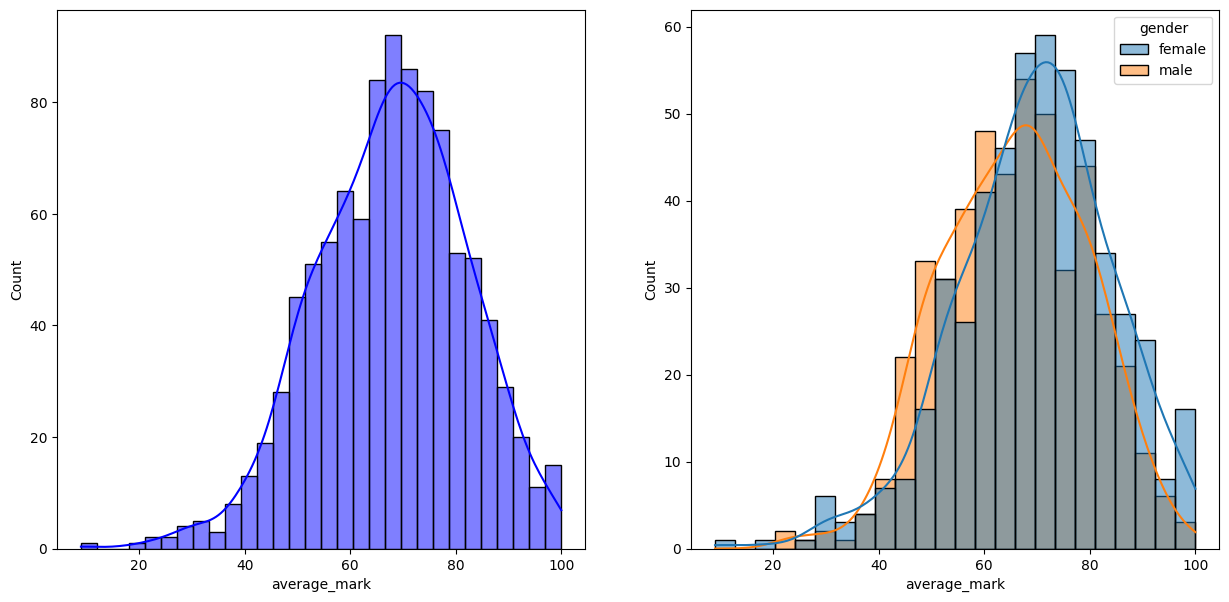

In [35]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_mark',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x="average_mark",kde=True,hue='gender')
plt.show()

## insights 
from the above graph the female have performed better than male


visualizing the total score distribustion to make conculsions using :
1) Histogram
2) KDE

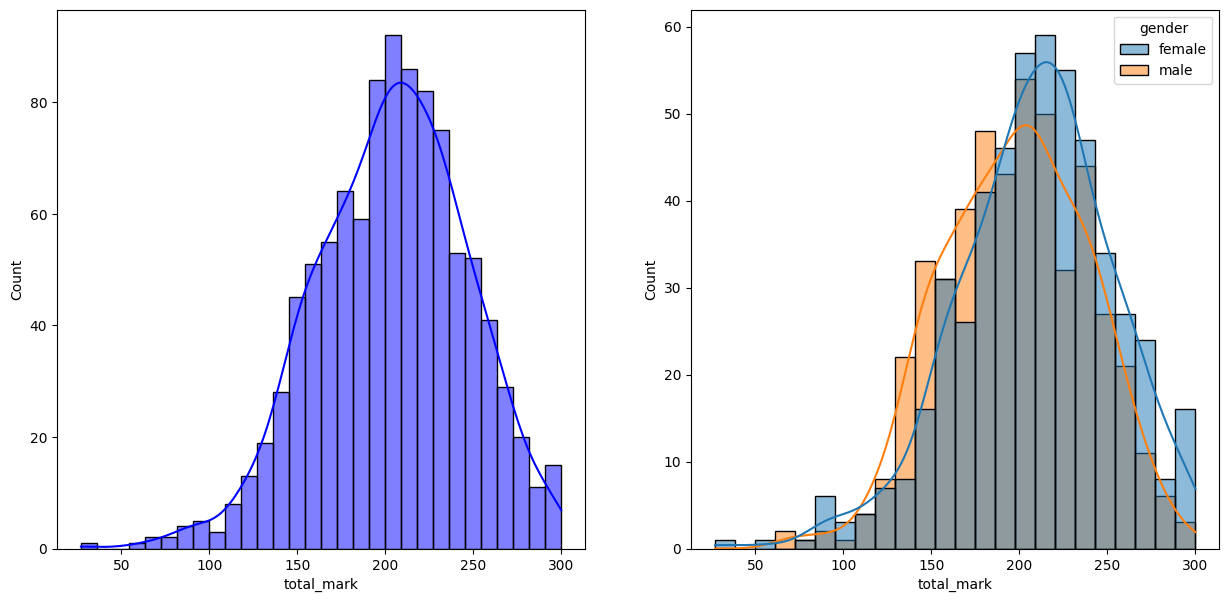

In [38]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_mark',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x="total_mark",kde=True,hue='gender')
plt.show()